In [17]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [37]:
df = pd.read_excel("Applicant-details.xlsx")

In [30]:
df

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
17457,9760129,44,12,1,0,0,9,10,26,11,10,1
74862,6994513,76,18,1,2,1,20,221,20,6,14,0
31973,3181072,57,12,1,2,1,1,121,28,10,12,0
33069,4937591,60,2,1,2,0,6,66,2,2,13,1
84293,1405890,34,2,1,1,0,27,157,25,2,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42266,2854227,57,3,1,2,0,5,186,25,3,13,0
12383,3861206,55,18,1,2,0,2,18,25,10,11,0
56420,5683509,62,19,1,2,0,42,264,23,4,14,1
1395,7128178,67,5,1,2,1,30,264,23,5,13,0


In [38]:
df = df.sample(frac=1)

In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])

In [71]:
#make sure only 0's and 1's in Loan_Default_Risk column
unique_values = df['Loan_Default_Risk'].unique()
print(unique_values)

[0 1]


In [5]:
df

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,1,2,0,40,129,19,0,12,0
1,80185,9259353,37,18,1,2,0,36,29,28,12,11,0
2,19865,1509721,66,8,1,2,0,19,126,13,4,12,0
3,76700,5867312,43,1,1,1,0,7,170,0,1,13,1
4,92992,7223191,44,9,1,2,0,0,23,28,9,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,156398,69,10,1,2,1,49,35,19,7,14,0
99996,54887,1900932,69,11,1,2,0,33,91,22,5,10,0
99997,76821,6395936,66,11,1,1,0,12,98,6,11,14,0
99998,861,4505937,52,6,1,2,0,36,183,11,6,14,0


In [40]:
output = df['Loan_Default_Risk']

In [41]:
df = df.drop('Applicant_ID',axis = 1)

In [ ]:
df

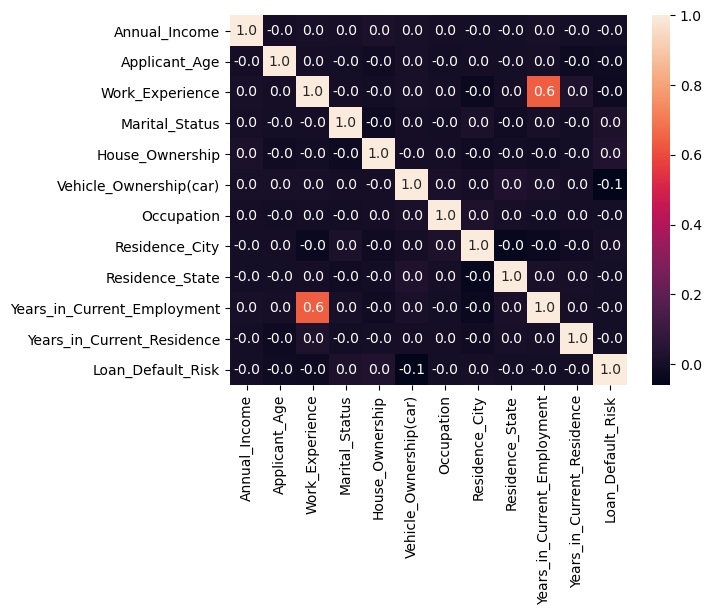

In [20]:
sns.heatmap(df.corr(),annot = True, fmt=".1f")
plt.show()

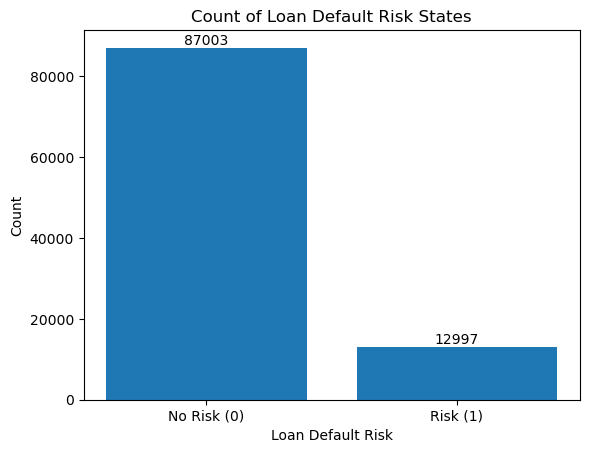

In [53]:
counts = df['Loan_Default_Risk'].value_counts()

# Plotting
bars = plt.bar(counts.index, counts.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.xlabel('Loan Default Risk')
plt.ylabel('Count')
plt.title('Count of Loan Default Risk States')
plt.xticks(ticks=[0, 1], labels=['No Risk (0)', 'Risk (1)'])  # Setting the x-ticks for clarity
plt.show()

## Model

In [70]:
test_len = int(len(df) * 0.8)

#train data
x_train = df.take(range(test_len)) 
y_train = df['Loan_Default_Risk'].iloc[:test_len]

#test data
x_test = df.take(range(test_len, len(df)) )
y_test = df['Loan_Default_Risk'].iloc[test_len:]

model = keras.Sequential()

#model.add( tf.keras.layers.Dense(2048, activation='relu',name = 'Input'))
          
#model.add( tf.keras.layers.Dense(1024, activation='relu'))

model.add( tf.keras.layers.Dense(13, activation='relu'))
model.add( tf.keras.layers.Dense(64, activation='relu'))

model.add( tf.keras.layers.Dense(
    32, input_dim=32,
    kernel_regularizer=tf.keras.regularizers.L1(0.0001),
    activity_regularizer=tf.keras.regularizers.L2(0.0001)) )

model.add( tf.keras.layers.Dense(16, activation='relu'))
model.add( tf.keras.layers.Dense(8, activation='relu'))

# add the output layer with 1 unit (for binary classification) and softmax activation function
# softmax converts logits to probabilities
model.add( tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer'))

#build model based on shape of training data
model.build( x_train.shape )
model.summary()

# compile the model with Adam optimiser, sparse categorical crossentropy loss function, and accuracy metric
#adam optimiser adapts learning rate during training
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

import random

# fit the model to the training data with a specified number of epochs and a batch size chosen randomly between 2000 and 5000
model.fit(x_train, y_train, epochs=500, batch_size=random.randint(2000,5000))

predictions = model.predict([x_test])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (80000, 13)               169       
                                                                 
 dense_148 (Dense)           (80000, 64)               896       
                                                                 
 dense_149 (Dense)           (80000, 32)               2080      
                                                                 
 dense_150 (Dense)           (80000, 16)               528       
                                                                 
 dense_151 (Dense)           (80000, 8)                136       
                                                                 
 output_layer (Dense)        (80000, 1)                9         
                                                                 
Total params: 3,818
Trainable params: 3,818
Non-train

30/30 [==============================] - 1s 23ms/step - loss: 2.2607 - accuracy: 0.8685
Epoch 70/500
30/30 [==============================] - 1s 20ms/step - loss: 7.3970 - accuracy: 0.8349
Epoch 71/500
30/30 [==============================] - 1s 22ms/step - loss: 2.9113 - accuracy: 0.8593
Epoch 72/500
30/30 [==============================] - 1s 24ms/step - loss: 2.9828 - accuracy: 0.8517
Epoch 73/500
30/30 [==============================] - 1s 30ms/step - loss: 1.9329 - accuracy: 0.8567
Epoch 74/500
30/30 [==============================] - 1s 23ms/step - loss: 1.8231 - accuracy: 0.8629
Epoch 75/500
30/30 [==============================] - 1s 21ms/step - loss: 1.7729 - accuracy: 0.8699
Epoch 76/500
30/30 [==============================] - 1s 25ms/step - loss: 0.9673 - accuracy: 0.8699
Epoch 77/500
30/30 [==============================] - 1s 18ms/step - loss: 0.6288 - accuracy: 0.8699
Epoch 78/500
30/30 [==============================] - 1s 23ms/step - loss: 6.1236 - accuracy: 0.8457
Epo

30/30 [==============================] - 1s 23ms/step - loss: 1.5631 - accuracy: 0.8699
Epoch 150/500
30/30 [==============================] - 1s 28ms/step - loss: 25.5395 - accuracy: 0.8699
Epoch 151/500
30/30 [==============================] - 1s 28ms/step - loss: 3.3869 - accuracy: 0.8699
Epoch 152/500
30/30 [==============================] - 1s 28ms/step - loss: 0.6689 - accuracy: 0.8699
Epoch 153/500
30/30 [==============================] - 1s 28ms/step - loss: 1.4011 - accuracy: 0.8699
Epoch 154/500
30/30 [==============================] - 1s 26ms/step - loss: 11.0133 - accuracy: 0.8698
Epoch 155/500
30/30 [==============================] - 1s 22ms/step - loss: 7.3319 - accuracy: 0.8699
Epoch 156/500
30/30 [==============================] - 1s 24ms/step - loss: 1.4878 - accuracy: 0.8699
Epoch 157/500
30/30 [==============================] - 1s 30ms/step - loss: 11.0411 - accuracy: 0.8699
Epoch 158/500
30/30 [==============================] - 1s 22ms/step - loss: 5.5422 - accuracy

30/30 [==============================] - 1s 26ms/step - loss: 14.2471 - accuracy: 0.8699
Epoch 230/500
30/30 [==============================] - 1s 26ms/step - loss: 79.3890 - accuracy: 0.8699
Epoch 231/500
30/30 [==============================] - 1s 21ms/step - loss: 4.0588 - accuracy: 0.8699
Epoch 232/500
30/30 [==============================] - 1s 24ms/step - loss: 1.5720 - accuracy: 0.8699
Epoch 233/500
30/30 [==============================] - 1s 24ms/step - loss: 88.5158 - accuracy: 0.8699
Epoch 234/500
30/30 [==============================] - 1s 21ms/step - loss: 63.0937 - accuracy: 0.8699
Epoch 235/500
30/30 [==============================] - 1s 24ms/step - loss: 8.0279 - accuracy: 0.8697
Epoch 236/500
30/30 [==============================] - 1s 23ms/step - loss: 10.0700 - accuracy: 0.8699
Epoch 237/500
30/30 [==============================] - 1s 20ms/step - loss: 6.6039 - accuracy: 0.8699
Epoch 238/500
30/30 [==============================] - 1s 24ms/step - loss: 33.3745 - accur

30/30 [==============================] - 1s 28ms/step - loss: 17.0051 - accuracy: 0.8699
Epoch 309/500
30/30 [==============================] - 1s 29ms/step - loss: 2.4996 - accuracy: 0.8699
Epoch 310/500
30/30 [==============================] - 1s 30ms/step - loss: 0.6809 - accuracy: 0.8699
Epoch 311/500
30/30 [==============================] - 1s 28ms/step - loss: 138.5025 - accuracy: 0.8699
Epoch 312/500
30/30 [==============================] - 1s 29ms/step - loss: 269.3705 - accuracy: 0.8699
Epoch 313/500
30/30 [==============================] - 1s 28ms/step - loss: 25.1752 - accuracy: 0.8699
Epoch 314/500
30/30 [==============================] - 1s 29ms/step - loss: 45.8042 - accuracy: 0.8699
Epoch 315/500
30/30 [==============================] - 1s 29ms/step - loss: 273.3069 - accuracy: 0.8699
Epoch 316/500
30/30 [==============================] - 1s 29ms/step - loss: 8.5658 - accuracy: 0.8699
Epoch 317/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7827 - ac

30/30 [==============================] - 1s 23ms/step - loss: 234.4492 - accuracy: 0.8699
Epoch 388/500
30/30 [==============================] - 1s 21ms/step - loss: 102.2394 - accuracy: 0.8699
Epoch 389/500
30/30 [==============================] - 0s 17ms/step - loss: 287.1244 - accuracy: 0.8699
Epoch 390/500
30/30 [==============================] - 1s 17ms/step - loss: 116.5001 - accuracy: 0.8699
Epoch 391/500
30/30 [==============================] - 1s 17ms/step - loss: 8.8774 - accuracy: 0.8699
Epoch 392/500
30/30 [==============================] - 1s 17ms/step - loss: 3.8696 - accuracy: 0.8699
Epoch 393/500
30/30 [==============================] - 1s 17ms/step - loss: 344.6841 - accuracy: 0.8699
Epoch 394/500
30/30 [==============================] - 1s 17ms/step - loss: 54.1126 - accuracy: 0.8699
Epoch 395/500
30/30 [==============================] - 1s 17ms/step - loss: 15.0424 - accuracy: 0.8699
Epoch 396/500
30/30 [==============================] - 1s 17ms/step - loss: 1.8729 -

30/30 [==============================] - 1s 30ms/step - loss: 19.9179 - accuracy: 0.8699
Epoch 467/500
30/30 [==============================] - 1s 29ms/step - loss: 44.2001 - accuracy: 0.8699
Epoch 468/500
30/30 [==============================] - 1s 28ms/step - loss: 284.0142 - accuracy: 0.8699
Epoch 469/500
30/30 [==============================] - 1s 28ms/step - loss: 45.2604 - accuracy: 0.8699
Epoch 470/500
30/30 [==============================] - 1s 30ms/step - loss: 8.0282 - accuracy: 0.8699
Epoch 471/500
30/30 [==============================] - 1s 29ms/step - loss: 1.8670 - accuracy: 0.8699
Epoch 472/500
30/30 [==============================] - 1s 28ms/step - loss: 3.7397 - accuracy: 0.8699
Epoch 473/500
30/30 [==============================] - 1s 28ms/step - loss: 688.8628 - accuracy: 0.8699
Epoch 474/500
30/30 [==============================] - 1s 30ms/step - loss: 48.2662 - accuracy: 0.8699
Epoch 475/500
30/30 [==============================] - 1s 26ms/step - loss: 59.3820 - ac

- Model ends up converging to an accuracy of .8699 but the loss fluctuates drastically from one epoch to another. This variance indicates the model is doing a poor job at mapping input features to ooutput --> a poor model fit.
- Probably a case of underfitting aswell since when I had larger values for the number of neurons in each layer I was not dealing with this issue

- For improved performance I  may need to try other optimisers, change the batch size or the number of epochs. Other techniques may need to be implemented on top of this such as increasing the number of neurons in each layer

- The change of number of neurons from (13,64,32,64,21,1) -- > (13,64,32,16,8,1) had improved the accuracy greatly but the loss function remains high thus indicating a lack of fit from the model

- When I initially had the number of neurons in the hundreds and thousands my model was taking longer to run but achieved slighlty better accuracy with a more consistent loss from iteration to iteration

- Next I'll try XGBoost on the data to see if it yields better results